<a href="https://colab.research.google.com/github/ToriStoner/Assignment-2-Data-/blob/main/SQLite_1st_Assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Create a connection to an SQLite database
import sqlite3
connection = sqlite3.connect('student_grades.db')
print("Database created and connected!")

Database created and connected!


In [3]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [4]:
#create students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Sales table created!")

Sales table created!


In [5]:
#create grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY(student_id) REFERENCES students(student_id)

)
''')

print("Sales table created!")

Sales table created!


In [6]:
#insert data into student table
student_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', student_data)

# Commit the transaction
connection.commit()

print("Data inserted into the student table!")

Data inserted into the student table!


In [7]:
# insert data into grades table
grades_data = [
    (1,1,'Math',95),
    (2,1,'English',88),
    (3,1,'History', 90),
    (4,2,'Math', 82),
    (5,2,'English',76),
    (6,2,'History',85),
    (7,3,'Math', 87),
    (8,3,'English',73),
    (9,3,'History',81),
    (10,4,'Math', 89),
    (11,4,'English',94),
    (12,4,'History',87),
    (13,5,'Math', 81),
    (14,5,'English',77),
    (15,5,'History',98)
]


# Insert data into the grades table
cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?,?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")


Data inserted into the grades table!


In [8]:
#Retrieve all students' names and their grades

cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()

print("Joined student names and grade details:")
for row in joined_data:
    print(row)

Joined student names and grade details:
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 87)
('Carol', 'White', 73)
('Carol', 'White', 81)
('David', 'Brown', 89)
('David', 'Brown', 94)
('David', 'Brown', 87)
('Eve', 'Davis', 81)
('Eve', 'Davis', 77)
('Eve', 'Davis', 98)


In [9]:
#Find the average grade for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

average_grades = cursor.fetchall()

print("Average grades for each student:")
for grades in average_grades:
  print(f"{grades[0]} {grades[1]}: {grades[2]}")



Average grades for each student:
Alice Johnson: 91.0
Bob Smith: 81.0
Carol White: 80.33333333333333
David Brown: 90.0
Eve Davis: 85.33333333333333


In [10]:
#Find the student with the highest average grade

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY AVG(grades.grade)DESC
LIMIT 1
''')

highest_grade = cursor.fetchone()

print(f"The student with the highest average grade is: {highest_grade[0]} {highest_grade[1]} with a {highest_grade[2]}")



The student with the highest average grade is: Alice Johnson with a 91.0


In [11]:
#Find the average grade for the Math subject

cursor.execute('''
SELECT AVG(grade)
FROM grades
WHERE subject = 'Math'
''')

avg_math = cursor.fetchone()[0]

print(f"The average grade for math is: {avg_math}")


The average grade for math is: 86.8


In [12]:
#List all students who scored above 90 in any subject

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
GROUP BY students.first_name, students.last_name
''')

students_above_90 = cursor.fetchall()

print("Students who scored above a 90 in any subject:")
for student in students_above_90:
  print(f"{student[0]} {student[1]}")


Students who scored above a 90 in any subject:
Alice Johnson
David Brown
Eve Davis


In [13]:
#5 Load data into pandas

import pandas as pd

df = pd.read_sql_query('SELECT * FROM students', connection)

df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [14]:
import pandas as pd

df2 = pd.read_sql_query('SELECT * FROM grades', connection)

df2.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [15]:
#Use join to combine data into single df that includes student's name, subject, and grade

new_df = pd.read_sql_query('SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students JOIN grades ON students.student_id = grades.student_id', connection)

new_df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


In [16]:
#Plot the average grades of each student

import matplotlib.pyplot as plt

avg_df = pd.read_sql_query('SELECT students.first_name, students.last_name, AVG(grades.grade) FROM students JOIN grades ON students.student_id = grades.student_id GROUP BY students.student_id', connection)


avg_df.rename(columns={'first_name': 'First Name', 'last_name': 'Last Name', 'AVG(grades.grade)': 'Average Grade'}, inplace=True)
avg_df.head()






,First Name,Last Name,Average Grade
0,Alice,Johnson,91.000000
1,Bob,Smith,81.000000
2,Carol,White,80.333333
3,David,Brown,90.000000
4,Eve,Davis,85.333333


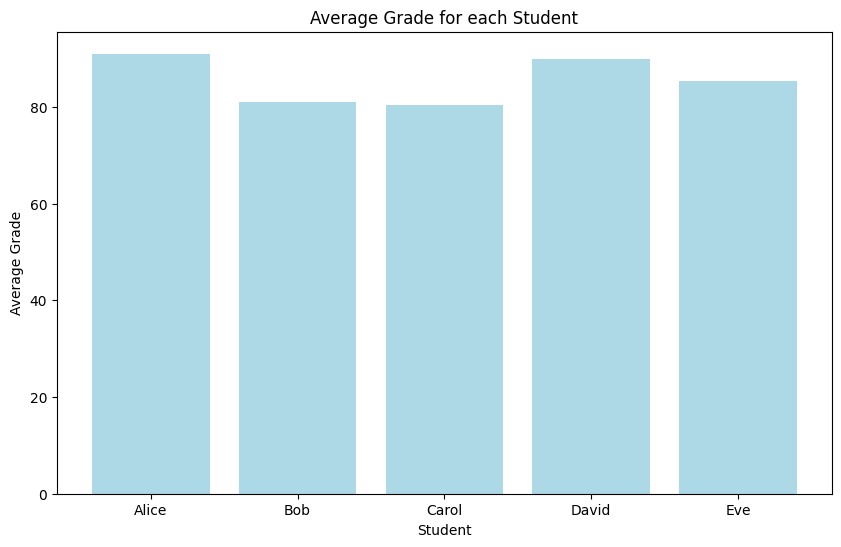

In [17]:
plt.figure(figsize=(10,6))
plt.bar(avg_df['First Name'], avg_df['Average Grade'], color='lightblue')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade for each Student')
plt.show()

In [18]:
#Create a bar chart showing the average grade for each subject

subjects_df = pd.read_sql_query('SELECT subject, AVG(grades.grade) FROM grades GROUP BY subject', connection)

subjects_df.rename(columns={'subject': 'Subject', 'AVG(grades.grade)': 'Average Grade'}, inplace=True)
subjects_df.head()





,Subject,Average Grade
0,English,81.6
1,History,88.2
2,Math,86.8


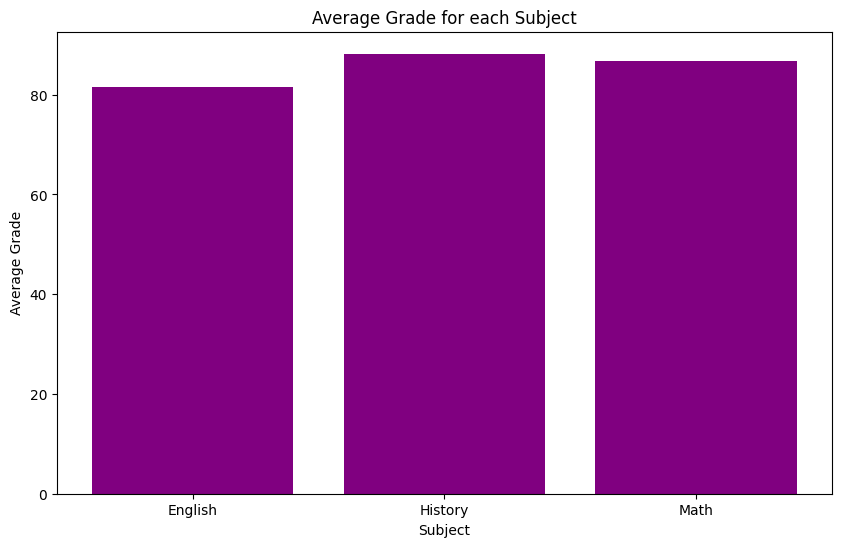

In [19]:
plt.figure(figsize=(10,6))
plt.bar(subjects_df['Subject'], subjects_df['Average Grade'], color='purple')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for each Subject')
plt.show()


In [26]:
#Bonus task--> student with highest grade in each subject, visualize using a grouped bar chart

grades_df = pd.read_sql_query('SELECT students.first_name, Max(grades.grade), grades.subject FROM grades JOIN students ON grades.student_id = students.student_id GROUP BY grades.subject', connection)

grades_df


,first_name,Max(grades.grade),subject
0,David,94,English
1,Eve,98,History
2,Alice,95,Math


In [31]:
grades_df.rename(columns={'first_name': 'Student', 'Max(grades.grade)': 'Highest Grade', 'subject': 'Subject'}, inplace=True)

grades_df

,Student,Highest Grade,Subject
0,David,94,English
1,Eve,98,History
2,Alice,95,Math


<Axes: xlabel='Subject', ylabel='Highest Grade'>

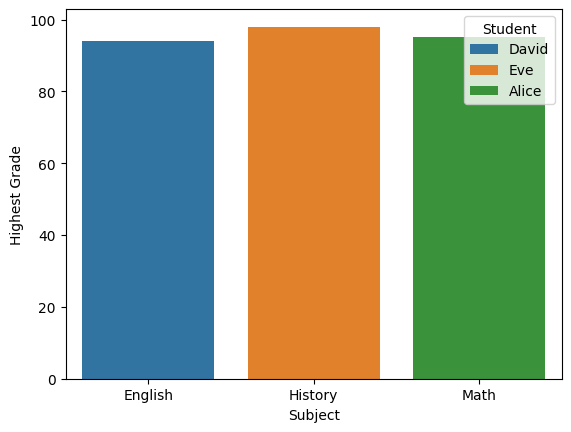

In [39]:
#Visualize using a grouped bar chart
import seaborn as sns
sns.barplot(data = grades_df, x = 'Subject', y = 'Highest Grade', hue = 'Student')


